In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,8)

In [ ]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 22.8MB/s]


<Axes: xlabel='DATE'>

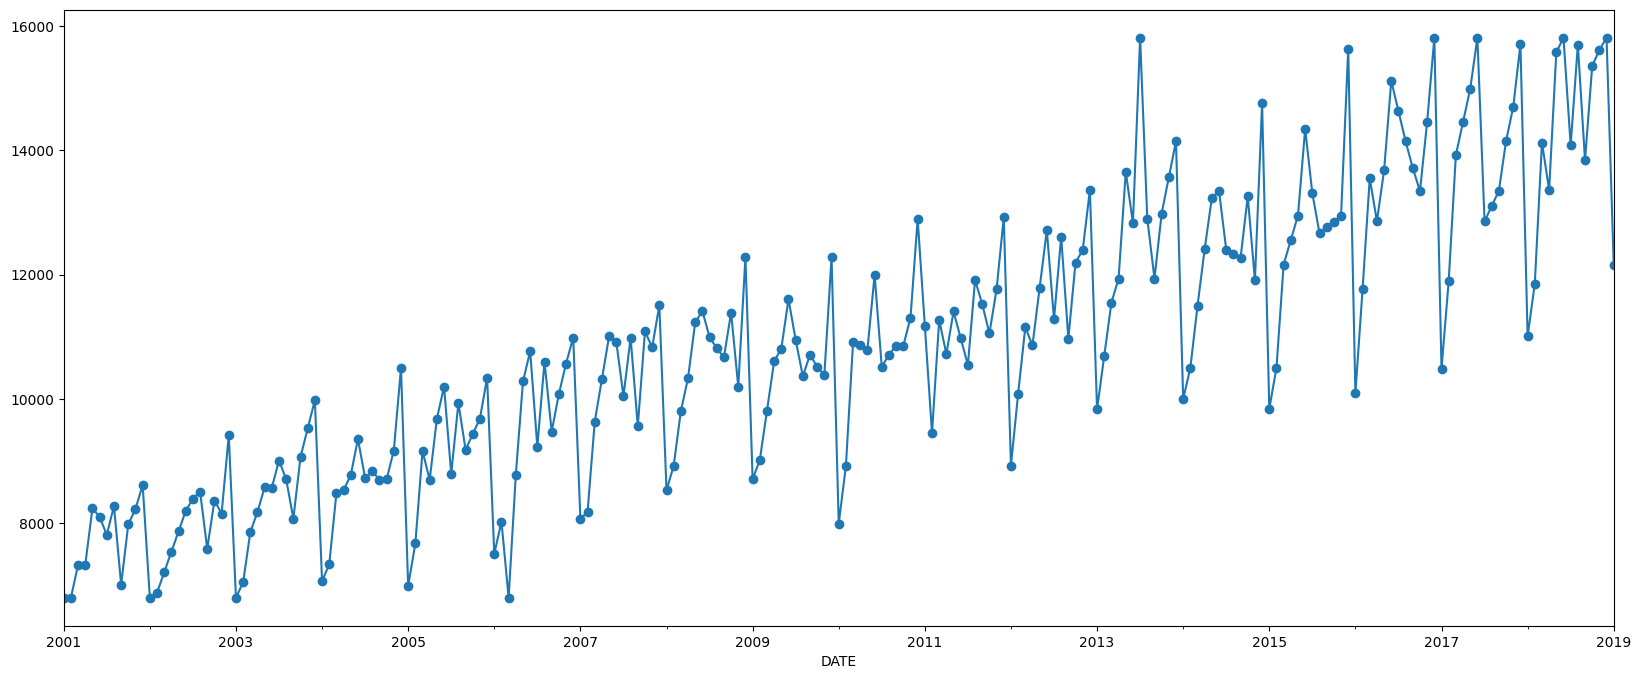

In [ ]:
mobile_sales = pd.read_excel('/content/mobilesales.xlsx')
# set index
mobile_sales.set_index('DATE', inplace=True)
# linear interpolation
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')
# anomalies - clip quantiles
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02))
# plot
mobile_sales.Sales.plot(style='-o')

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape

)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_max_date = mobile_sales.index[-12]
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 536.809
RMSE : 622.984
MAPE: 0.037


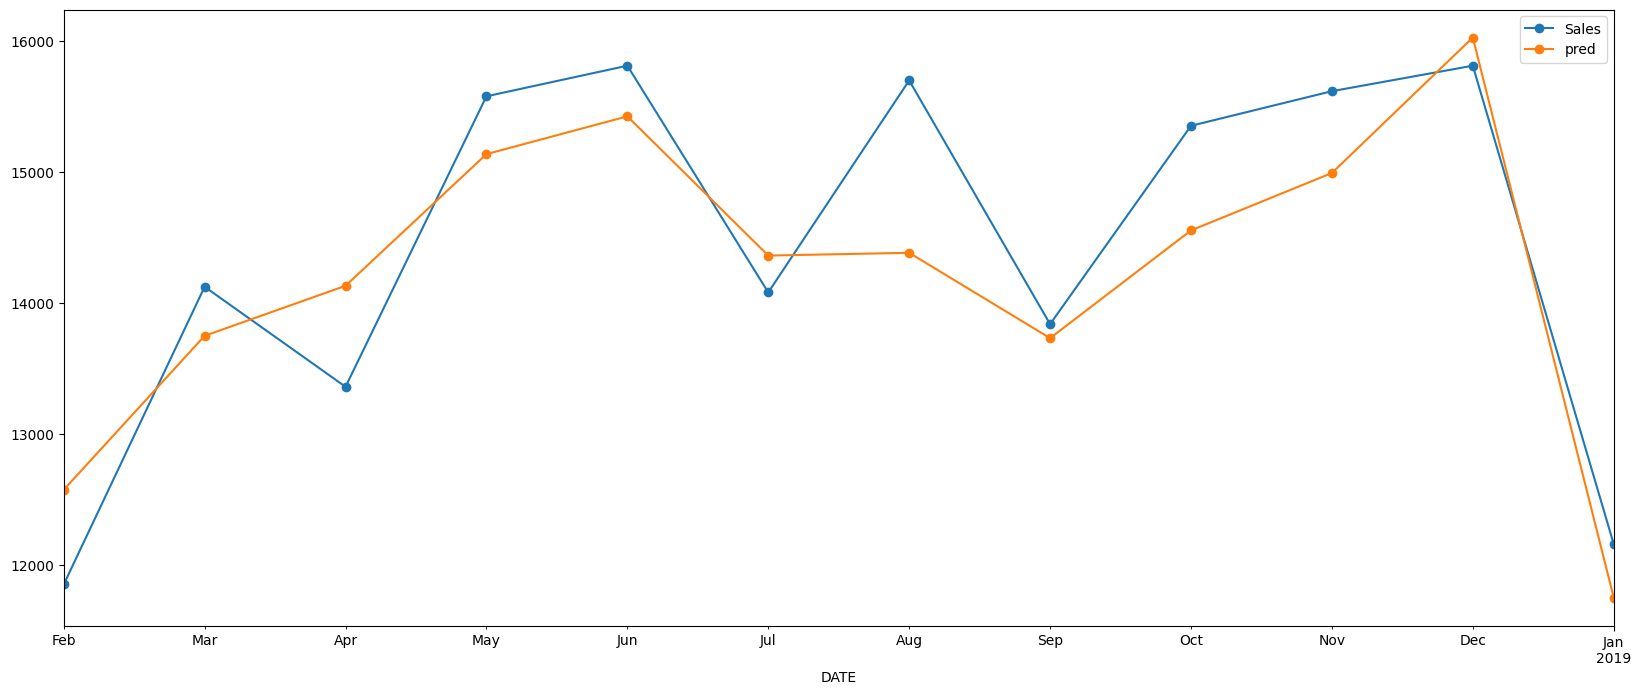

In [ ]:
model = SARIMAX(train_x.Sales, order=(3, 1, 3), seasonal_order=(1,1,1,12))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

In [ ]:
test_x[['lower', 'upper']] = model.get_forecast(steps=12).conf_int(0.05).values
test_x.head()

,Sales,pred,lower,upper
DATE,,,,
2018-02-01,11852.0,12574.264496,11007.630312,14140.898680
2018-03-01,14123.0,13748.852295,12133.157064,15364.547526
2018-04-01,13360.0,14130.517357,12507.545936,15753.488777
2018-05-01,15576.0,15134.883886,13506.445495,16763.322277
2018-06-01,15809.4,15423.234758,13794.337215,17052.132301


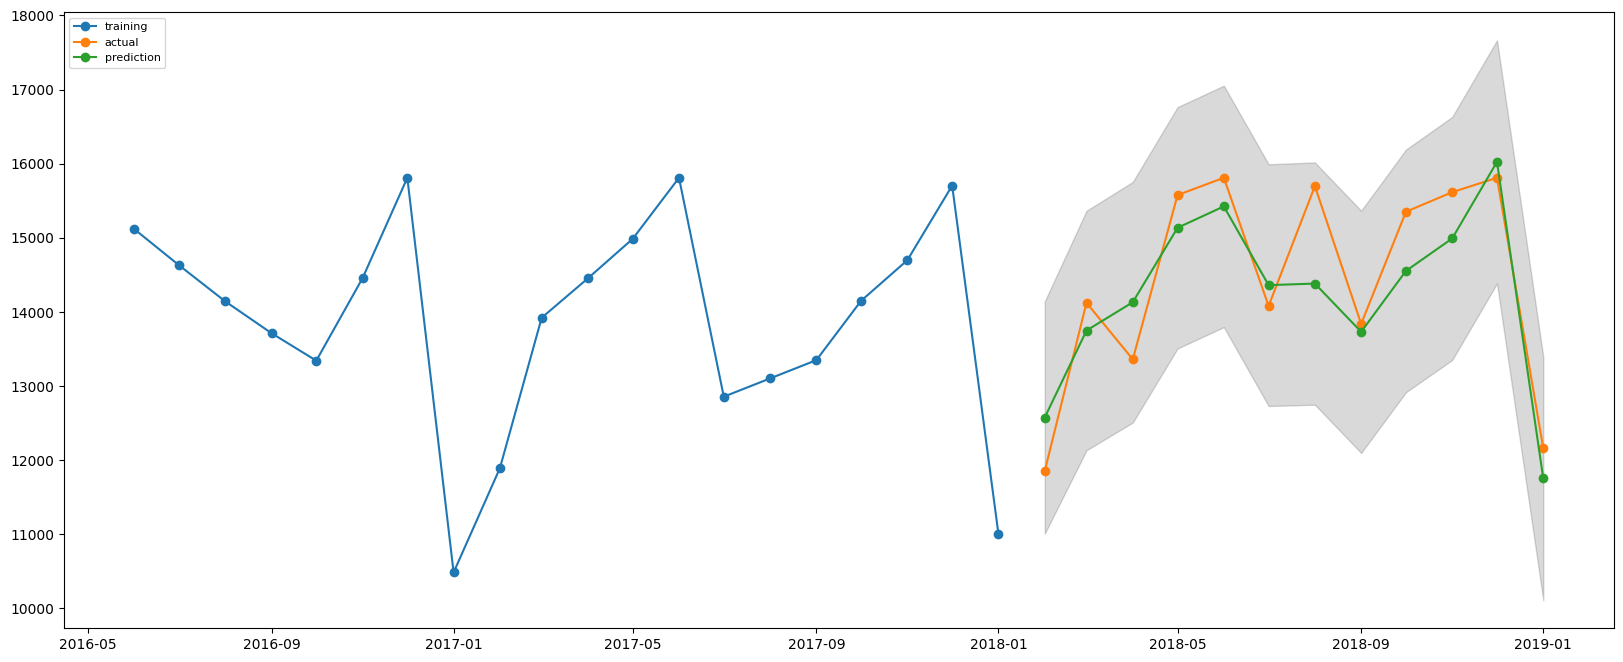

In [ ]:
plt.plot(train_x['Sales'][-20:], '-o', label='training')

plt.plot(test_x['Sales'], '-o', label='actual')
plt.plot(test_x['pred'], '-o', label='prediction')

plt.fill_between(test_x.index, test_x['lower'], test_x['upper'],
                 color='k', alpha=.15)

plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
model.get_forecast(steps=1).conf_int(0.05)

,lower Sales,upper Sales
2018-02-01,11007.630312,14140.89868


In [ ]:
from IPython.display import Image
Image(url='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/007/752/original/illustration_of_change_point_detectopn_via_sliding-window.gif?1658421673')


In [ ]:
!gdown 16TAoRZ3S8ebgIq3dPQmWIXPw_1dZy3ta

Downloading...
From: https://drive.google.com/uc?id=16TAoRZ3S8ebgIq3dPQmWIXPw_1dZy3ta
To: /content/rest_vis.csv
100% 13.1k/13.1k [00:00<00:00, 29.0MB/s]


In [ ]:
df = pd.read_csv('/content/rest_vis.csv')
df.head()

,date,weekday,holiday,total
0,1/1/2016,Friday,1,296.0
1,1/2/2016,Saturday,0,191.0
2,1/3/2016,Sunday,0,202.0
3,1/4/2016,Monday,0,105.0
4,1/5/2016,Tuesday,0,98.0


In [ ]:
df.shape

(517, 4)

In [ ]:
366*1.5

549.0

In [ ]:
df.isna().sum()

,0
date,0
weekday,0
holiday,0
total,39


In [ ]:
df.tail(40)

,date,weekday,holiday,total
477,4/22/2017,Saturday,0,226.0
478,4/23/2017,Sunday,0,NaN
479,4/24/2017,Monday,0,NaN
480,4/25/2017,Tuesday,0,NaN
481,4/26/2017,Wednesday,0,NaN
482,4/27/2017,Thursday,0,NaN
483,4/28/2017,Friday,0,NaN
484,4/29/2017,Saturday,0,NaN
485,4/30/2017,Sunday,0,NaN
486,5/1/2017,Monday,0,NaN


In [ ]:
517-39

478

In [ ]:
df1 = df.copy()

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(478, 4)

In [ ]:
df.isna().sum()

,0
date,0
weekday,0
holiday,0
total,0


In [ ]:
478/7

68.28571428571429

In [ ]:
df.head()

,date,weekday,holiday,total
0,1/1/2016,Friday,1,296.0
1,1/2/2016,Saturday,0,191.0
2,1/3/2016,Sunday,0,202.0
3,1/4/2016,Monday,0,105.0
4,1/5/2016,Tuesday,0,98.0


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace = True)

df.head(5)

,weekday,holiday,total
date,,,
2016-01-01,Friday,1,296.0
2016-01-02,Saturday,0,191.0
2016-01-03,Sunday,0,202.0
2016-01-04,Monday,0,105.0
2016-01-05,Tuesday,0,98.0


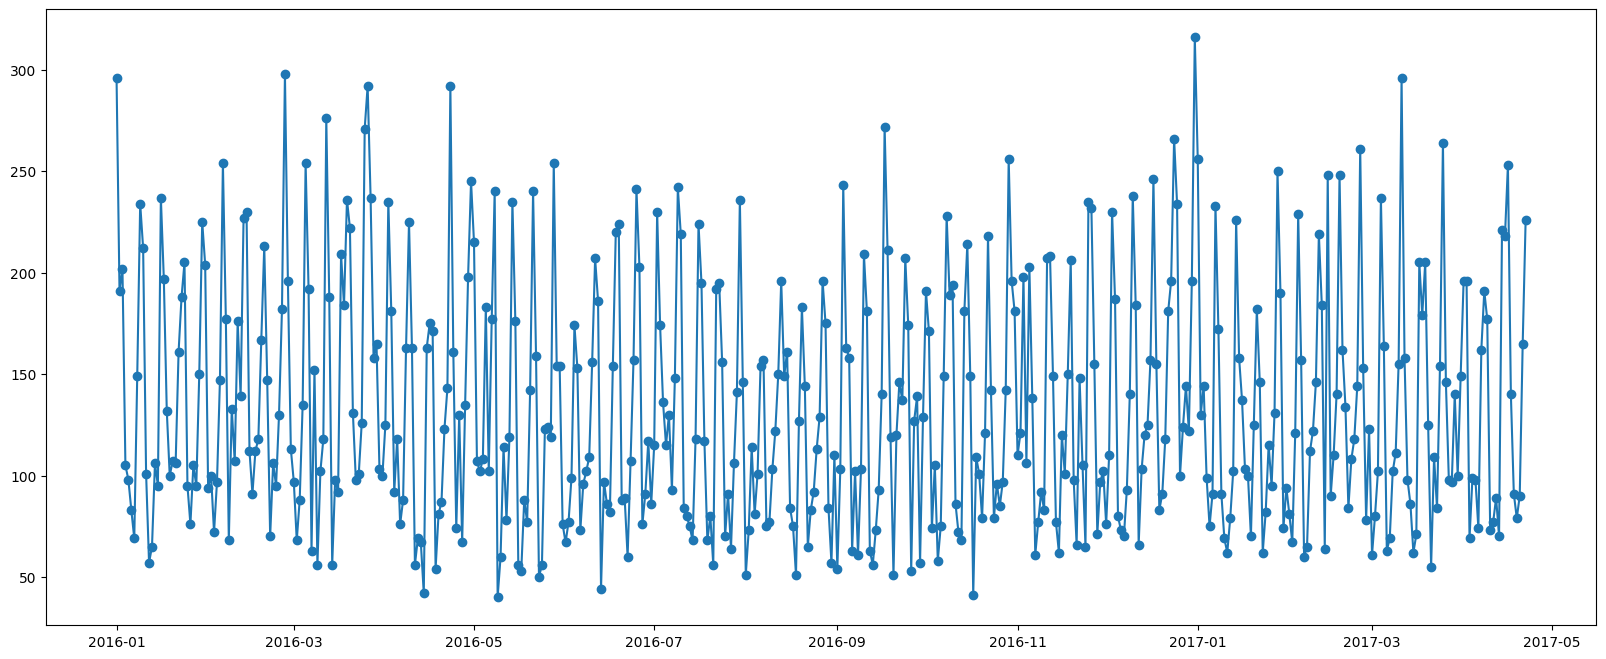

In [ ]:
plt.plot(df.index, df['total'], '-o')
plt.show()

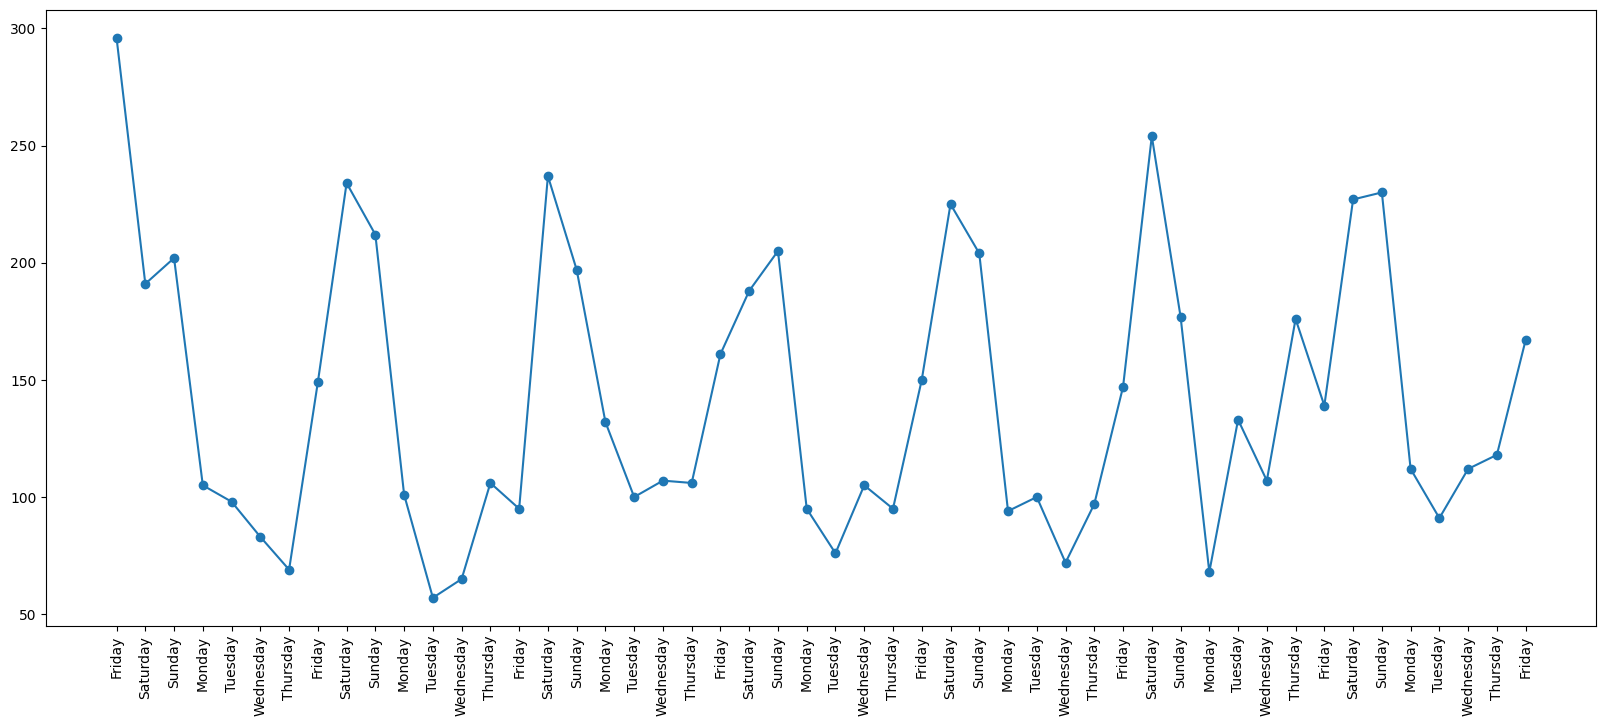

In [ ]:
plt.plot(range(50),df['total'][:50], '-o')
plt.xticks(range(0,50), df['weekday'][:50],rotation = 90)
plt.show()

In [ ]:
df['holiday'].value_counts()

,count
holiday,
0,446
1,32


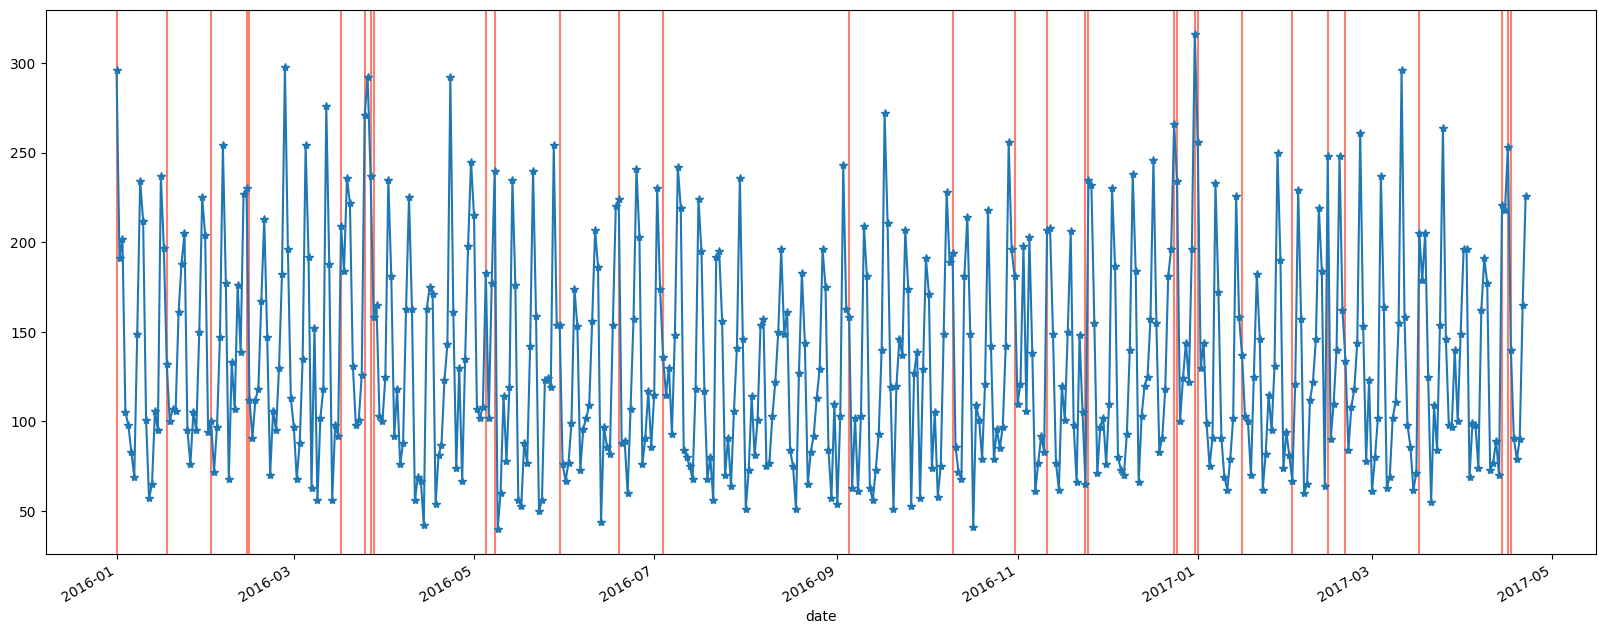

In [ ]:
holidays = df.loc[df.holiday==1].index

for hday in holidays:
    plt.axvline(x=hday, color='#FA8072')

df.total.plot(style='-*')

plt.show()

In [ ]:
df.shape

(478, 3)

In [ ]:
7*6

42

In [ ]:
478-42

436

In [ ]:
train = df.iloc[:436]
test = df.iloc[436:]

In [ ]:
train.head()

,weekday,holiday,total
date,,,
2016-01-01,Friday,1,296.0
2016-01-02,Saturday,0,191.0
2016-01-03,Sunday,0,202.0
2016-01-04,Monday,0,105.0
2016-01-05,Tuesday,0,98.0


# Without exog

In [ ]:
model = SARIMAX(train['total'], order=(1,0,1), seasonal_order=(1,0,1,7))  # a simple model
results = model.fit(disp=False)
predictions = results.forecast(42)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 24.667
RMSE : 31.609
MAPE: 0.203


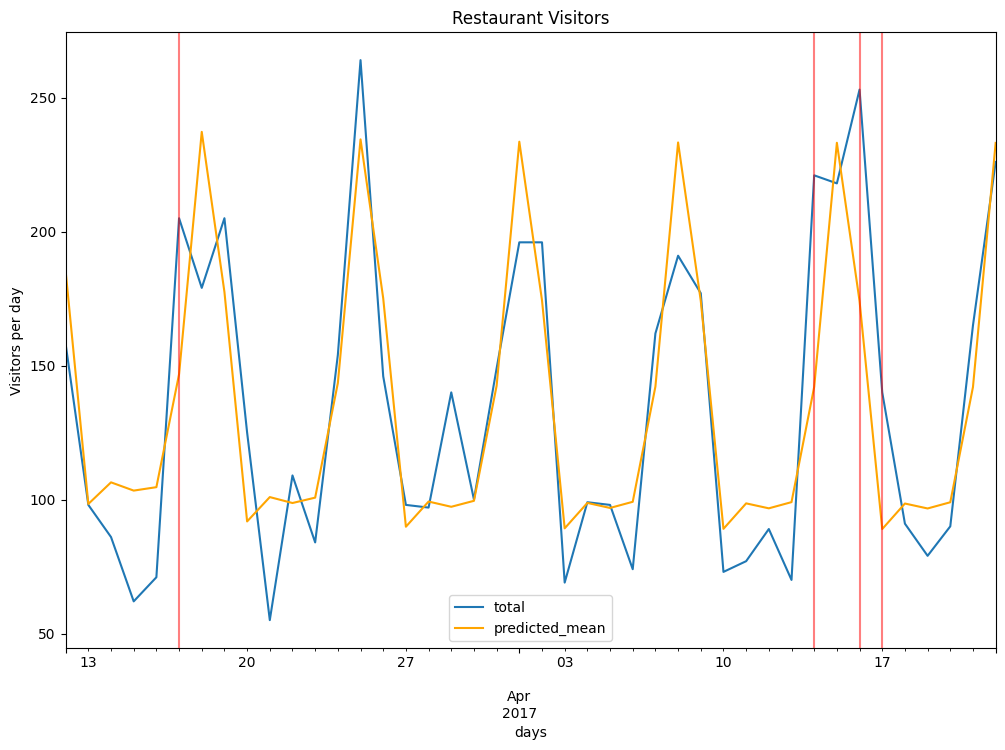

In [ ]:
performance(test['total'], predictions)

# Plot predictions against known values

title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['total'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='red', alpha = 0.5)

# with exog

In [ ]:
model = SARIMAX(train['total'], exog=train['holiday'] ,order=(1,0,1), seasonal_order=(1,0,1,7))  # a simple model
results = model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
predictions = results.forecast(steps = 42,  exog = test[['holiday']])

MAE : 18.483
RMSE : 22.986
MAPE: 0.159


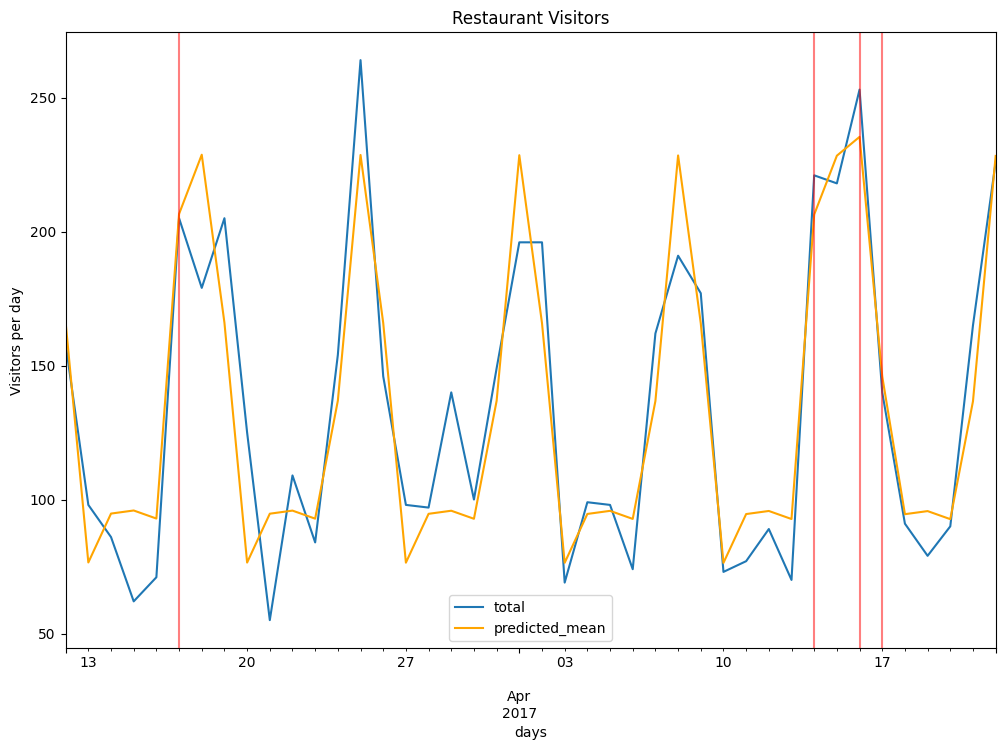

In [ ]:
performance(test['total'], predictions)

# Plot predictions against known values

title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['total'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='red', alpha = 0.5)

# Regression Task

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 16TAoRZ3S8ebgIq3dPQmWIXPw_1dZy3ta

Downloading...
From: https://drive.google.com/uc?id=16TAoRZ3S8ebgIq3dPQmWIXPw_1dZy3ta
To: /content/rest_vis.csv
100% 13.1k/13.1k [00:00<00:00, 37.0MB/s]


In [ ]:
df1 = pd.read_csv('rest_vis.csv')

In [ ]:
df = df1.copy()
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,date,weekday,holiday,total
0,2016-01-01,Friday,1,296.0
1,2016-01-02,Saturday,0,191.0
2,2016-01-03,Sunday,0,202.0
3,2016-01-04,Monday,0,105.0
4,2016-01-05,Tuesday,0,98.0


In [ ]:
df['weekend'] = np.where(((df['weekday'] == 'Saturday') | (df['weekday'] == 'Sunday')), 1, 0)
df.head()

,date,weekday,holiday,total,weekend
0,2016-01-01,Friday,1,296.0,0
1,2016-01-02,Saturday,0,191.0,1
2,2016-01-03,Sunday,0,202.0,1
3,2016-01-04,Monday,0,105.0,0
4,2016-01-05,Tuesday,0,98.0,0


In [ ]:
for i in range(1,32):
  df["Lag_{}".format(i)] = df['total'].shift(i)

In [ ]:
df.head()

,date,weekday,holiday,total,weekend,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,...,Lag_22,Lag_23,Lag_24,Lag_25,Lag_26,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31
0,2016-01-01,Friday,1,296.0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,Saturday,0,191.0,1,296.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,Sunday,0,202.0,1,191.0,296.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,Monday,0,105.0,0,202.0,191.0,296.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,Tuesday,0,98.0,0,105.0,202.0,191.0,296.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
lis = ['Lag_{}'.format(i) for i in range(1,32)]

df.dropna(inplace = True)

df['last_month_avg_level'] = df.loc[:,lis].sum(axis=1)/31
df.head()

,date,weekday,holiday,total,weekend,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,...,Lag_23,Lag_24,Lag_25,Lag_26,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31,last_month_avg_level
31,2016-02-01,Monday,0,94.0,0,204.0,225.0,150.0,95.0,105.0,...,234.0,149.0,69.0,83.0,98.0,105.0,202.0,191.0,296.0,143.419355
32,2016-02-02,Tuesday,1,100.0,0,94.0,204.0,225.0,150.0,95.0,...,212.0,234.0,149.0,69.0,83.0,98.0,105.0,202.0,191.0,136.903226
33,2016-02-03,Wednesday,0,72.0,0,100.0,94.0,204.0,225.0,150.0,...,101.0,212.0,234.0,149.0,69.0,83.0,98.0,105.0,202.0,133.967742
34,2016-02-04,Thursday,0,97.0,0,72.0,100.0,94.0,204.0,225.0,...,57.0,101.0,212.0,234.0,149.0,69.0,83.0,98.0,105.0,129.774194
35,2016-02-05,Friday,0,147.0,0,97.0,72.0,100.0,94.0,204.0,...,65.0,57.0,101.0,212.0,234.0,149.0,69.0,83.0,98.0,129.516129


In [ ]:
lis = ['Lag_{}'.format(i) for i in range(1,8)]

df['last_week_avg_level'] = df.loc[:,lis].sum(axis=1)/7
df.head()

,date,weekday,holiday,total,weekend,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,...,Lag_24,Lag_25,Lag_26,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31,last_month_avg_level,last_week_avg_level
31,2016-02-01,Monday,0,94.0,0,204.0,225.0,150.0,95.0,105.0,...,149.0,69.0,83.0,98.0,105.0,202.0,191.0,296.0,143.419355,135.714286
32,2016-02-02,Tuesday,1,100.0,0,94.0,204.0,225.0,150.0,95.0,...,234.0,149.0,69.0,83.0,98.0,105.0,202.0,191.0,136.903226,135.571429
33,2016-02-03,Wednesday,0,72.0,0,100.0,94.0,204.0,225.0,150.0,...,212.0,234.0,149.0,69.0,83.0,98.0,105.0,202.0,133.967742,139.000000
34,2016-02-04,Thursday,0,97.0,0,72.0,100.0,94.0,204.0,225.0,...,101.0,212.0,234.0,149.0,69.0,83.0,98.0,105.0,129.774194,134.285714
35,2016-02-05,Friday,0,147.0,0,97.0,72.0,100.0,94.0,204.0,...,57.0,101.0,212.0,234.0,149.0,69.0,83.0,98.0,129.516129,134.571429


In [ ]:
lis = ["Lag_{}".format(i) for i in range(1,15)]
df['last_2week_avg_level'] = df.loc[:,lis].sum(axis = 1)/14
df.head(3)

,date,weekday,holiday,total,weekend,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,...,Lag_25,Lag_26,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31,last_month_avg_level,last_week_avg_level,last_2week_avg_level
31,2016-02-01,Monday,0,94.0,0,204.0,225.0,150.0,95.0,105.0,...,69.0,83.0,98.0,105.0,202.0,191.0,296.0,143.419355,135.714286,139.214286
32,2016-02-02,Tuesday,1,100.0,0,94.0,204.0,225.0,150.0,95.0,...,149.0,69.0,83.0,98.0,105.0,202.0,191.0,136.903226,135.571429,136.500000
33,2016-02-03,Wednesday,0,72.0,0,100.0,94.0,204.0,225.0,150.0,...,234.0,149.0,69.0,83.0,98.0,105.0,202.0,133.967742,139.000000,136.500000


In [ ]:
df['dayofweek'] = df['date'].dt.dayofweek

df['visit_wrt_dow'] = df.groupby('dayofweek')['total'].transform('mean')
df[['visit_wrt_dow', 'dayofweek']].drop_duplicates()

,visit_wrt_dow,dayofweek
31,89.593750,0
32,94.531250,1
33,94.687500,2
34,99.015625,3
35,147.171875,4
36,229.125000,5
37,178.460317,6


In [ ]:
df.head()

,date,weekday,holiday,total,weekend,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,...,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31,last_month_avg_level,last_week_avg_level,last_2week_avg_level,dayofweek,visit_wrt_dow
31,2016-02-01,Monday,0,94.0,0,204.0,225.0,150.0,95.0,105.0,...,98.0,105.0,202.0,191.0,296.0,143.419355,135.714286,139.214286,0,89.593750
32,2016-02-02,Tuesday,1,100.0,0,94.0,204.0,225.0,150.0,95.0,...,83.0,98.0,105.0,202.0,191.0,136.903226,135.571429,136.500000,1,94.531250
33,2016-02-03,Wednesday,0,72.0,0,100.0,94.0,204.0,225.0,150.0,...,69.0,83.0,98.0,105.0,202.0,133.967742,139.000000,136.500000,2,94.687500
34,2016-02-04,Thursday,0,97.0,0,72.0,100.0,94.0,204.0,225.0,...,149.0,69.0,83.0,98.0,105.0,129.774194,134.285714,134.000000,3,99.015625
35,2016-02-05,Friday,0,147.0,0,97.0,72.0,100.0,94.0,204.0,...,234.0,149.0,69.0,83.0,98.0,129.516129,134.571429,133.357143,4,147.171875


In [ ]:
df.columns

Index(['date', 'weekday', 'holiday', 'total', 'weekend', 'Lag_1', 'Lag_2',
       'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7', 'Lag_8', 'Lag_9', 'Lag_10',
       'Lag_11', 'Lag_12', 'Lag_13', 'Lag_14', 'Lag_15', 'Lag_16', 'Lag_17',
       'Lag_18', 'Lag_19', 'Lag_20', 'Lag_21', 'Lag_22', 'Lag_23', 'Lag_24',
       'Lag_25', 'Lag_26', 'Lag_27', 'Lag_28', 'Lag_29', 'Lag_30', 'Lag_31',
       'last_month_avg_level', 'last_week_avg_level', 'last_2week_avg_level',
       'dayofweek', 'visit_wrt_dow'],
      dtype='object')

In [ ]:
df = df[['total', 'Lag_1', 'Lag_2', 'Lag_3', 'last_month_avg_level', 'last_week_avg_level',
          'last_2week_avg_level', 'visit_wrt_dow', 'weekend','holiday']]

In [ ]:
df.head()

,total,Lag_1,Lag_2,Lag_3,last_month_avg_level,last_week_avg_level,last_2week_avg_level,visit_wrt_dow,weekend,holiday
31,94.0,204.0,225.0,150.0,143.419355,135.714286,139.214286,89.593750,0,0
32,100.0,94.0,204.0,225.0,136.903226,135.571429,136.500000,94.531250,0,1
33,72.0,100.0,94.0,204.0,133.967742,139.000000,136.500000,94.687500,0,0
34,97.0,72.0,100.0,94.0,129.774194,134.285714,134.000000,99.015625,0,0
35,147.0,97.0,72.0,100.0,129.516129,134.571429,133.357143,147.171875,0,0


In [ ]:
train = df.iloc[:df.shape[0]-42].dropna()
test = df.iloc[df.shape[0]-42:]

In [ ]:
X_train = train.drop(["total"],axis =1)
y_train = train['total']

X_test = test.drop(["total"],axis =1)
y_test = test['total']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)
# y_test

In [ ]:
y_pred = pd.Series(pred,index = test.index)
y_pred.head()

,0
436,176.295251
437,78.206591
438,97.059241
439,93.649415
440,93.657530


In [ ]:
mape(test['total'], y_pred)

0.15995150037337083

In [ ]:
# NY Taxi fare prediction (time series)
# GBDT applied
# https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction

In [ ]:
!pip install pystan~=2.14

!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pystan)


In [ ]:
from prophet import Prophet

In [ ]:
df = df1.copy()
df.head()

,date,weekday,holiday,total
0,1/1/2016,Friday,1,296.0
1,1/2/2016,Saturday,0,191.0
2,1/3/2016,Sunday,0,202.0
3,1/4/2016,Monday,0,105.0
4,1/5/2016,Tuesday,0,98.0


In [ ]:
# df[['ds', 'y', 'extra1', 'extra2', 'extra3']]


df['ds'] = pd.to_datetime(df['date'])
df['y'] = df['total']
df = df[['ds', 'y', 'holiday']] # prophet need specific names.

df.head()

,ds,y,holiday
0,2016-01-01,296.0,1
1,2016-01-02,191.0,0
2,2016-01-03,202.0,0
3,2016-01-04,105.0,0
4,2016-01-05,98.0,0


In [ ]:
m = Prophet()
m.fit(df[['ds', 'y']][:-39])

future = m.make_future_dataframe(periods=39, freq="D")
forecast = m.predict(future)
forecast.head()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvbhlms0k/icfoi5gc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvbhlms0k/y9zetwnk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45316', 'data', 'file=/tmp/tmpvbhlms0k/icfoi5gc.json', 'init=/tmp/tmpvbhlms0k/y9zetwnk.json', 'output', 'file=/tmp/tmpvbhlms0k/prophet_model7i5_2nbw/prophet_model-20241111022836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:28:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:28:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,143.063944,115.437526,200.214959,143.063944,143.063944,15.210221,15.210221,15.210221,15.210221,15.210221,15.210221,0.0,0.0,0.0,158.274165
1,2016-01-02,142.991656,199.362725,278.359010,142.991656,142.991656,94.494042,94.494042,94.494042,94.494042,94.494042,94.494042,0.0,0.0,0.0,237.485698
2,2016-01-03,142.919367,150.193883,229.076114,142.919367,142.919367,46.765696,46.765696,46.765696,46.765696,46.765696,46.765696,0.0,0.0,0.0,189.685063
3,2016-01-04,142.847079,58.072446,139.244794,142.847079,142.847079,-42.866641,-42.866641,-42.866641,-42.866641,-42.866641,-42.866641,0.0,0.0,0.0,99.980438
4,2016-01-05,142.774790,64.008074,141.924252,142.774790,142.774790,-39.702954,-39.702954,-39.702954,-39.702954,-39.702954,-39.702954,0.0,0.0,0.0,103.071837


<Axes: >

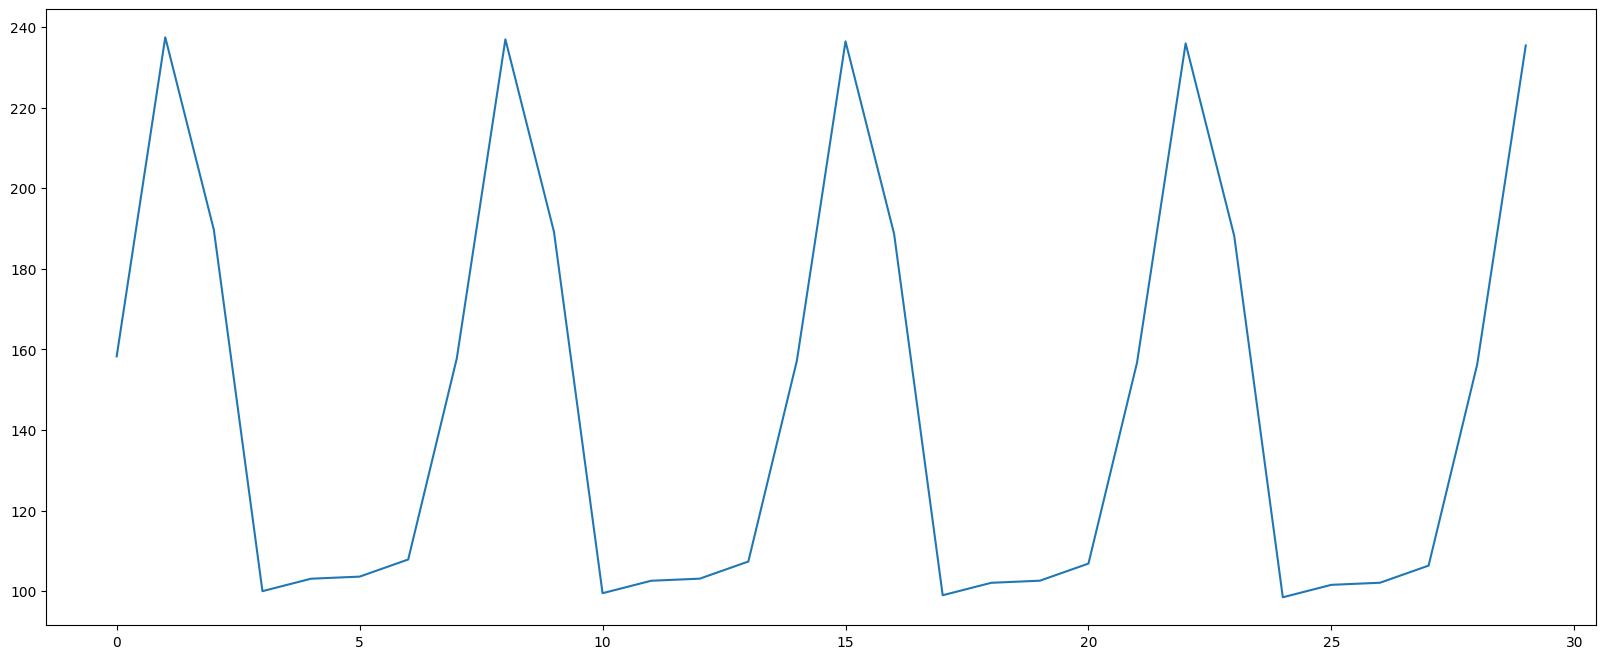

In [ ]:
forecast['yhat'][:30].plot()

<Axes: >

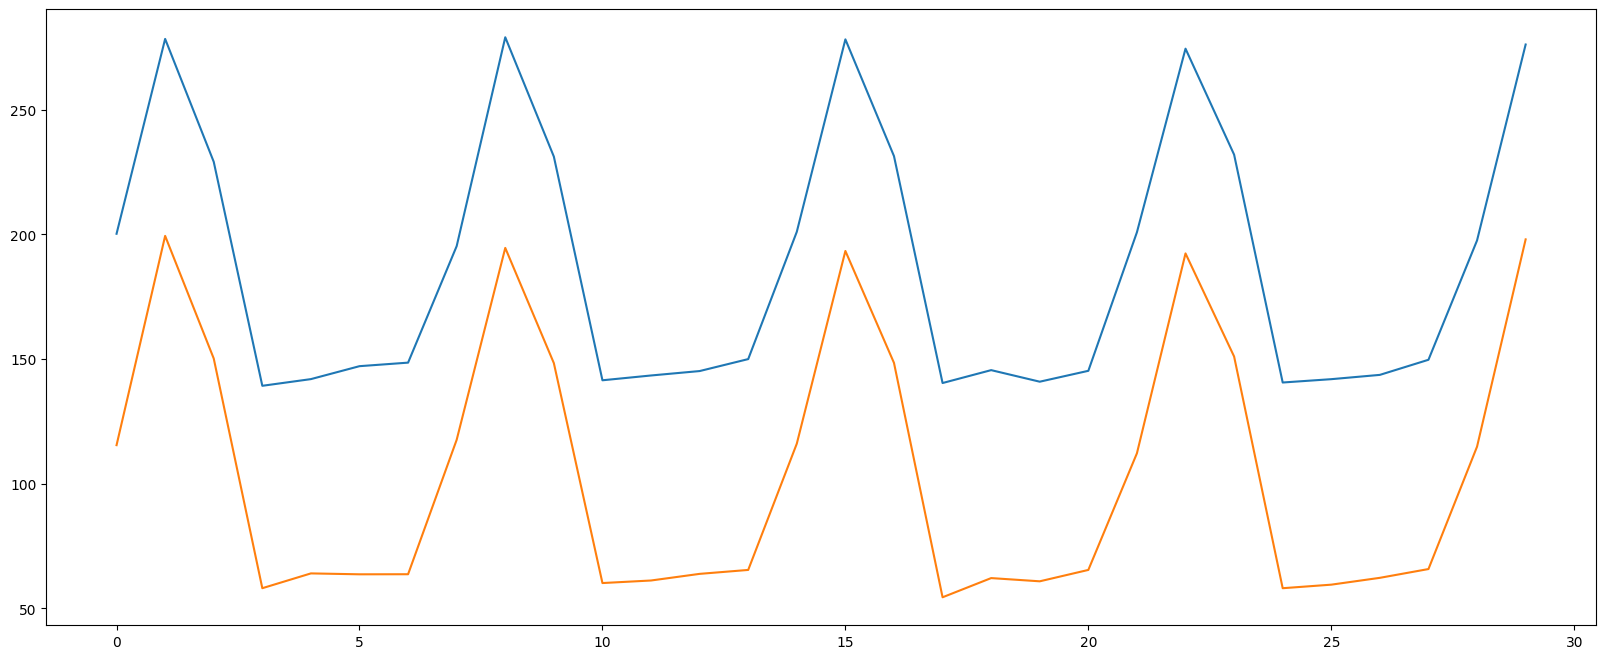

In [ ]:
forecast['yhat_upper'][:30].plot()
forecast['yhat_lower'][:30].plot()

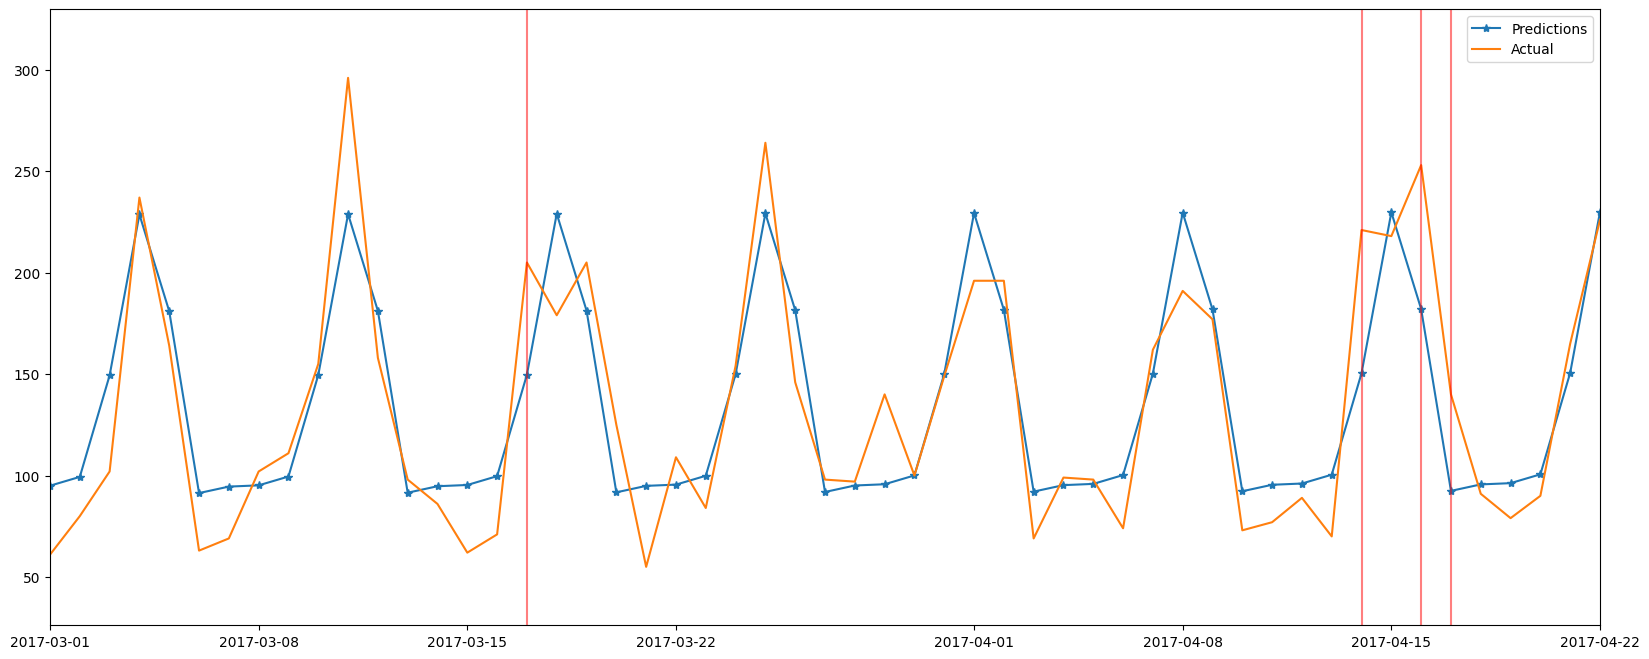

In [ ]:
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(df['ds'], df['y'], label = 'Actual')

for x in df.query('holiday==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);

plt.xlim(pd.to_datetime('2017-03-01'), pd.to_datetime('2017-04-22'))
plt.legend()

In [ ]:
model2 = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model2.add_regressor('holiday') #adding exog-> holidays data in the model2


model2.fit(df[:-39])
forecast2 = model2.predict(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvbhlms0k/6lvmp447.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvbhlms0k/n34q_qu1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20993', 'data', 'file=/tmp/tmpvbhlms0k/6lvmp447.json', 'init=/tmp/tmpvbhlms0k/n34q_qu1.json', 'output', 'file=/tmp/tmpvbhlms0k/prophet_model262_thaa/prophet_model-20241111023755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:37:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:37:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


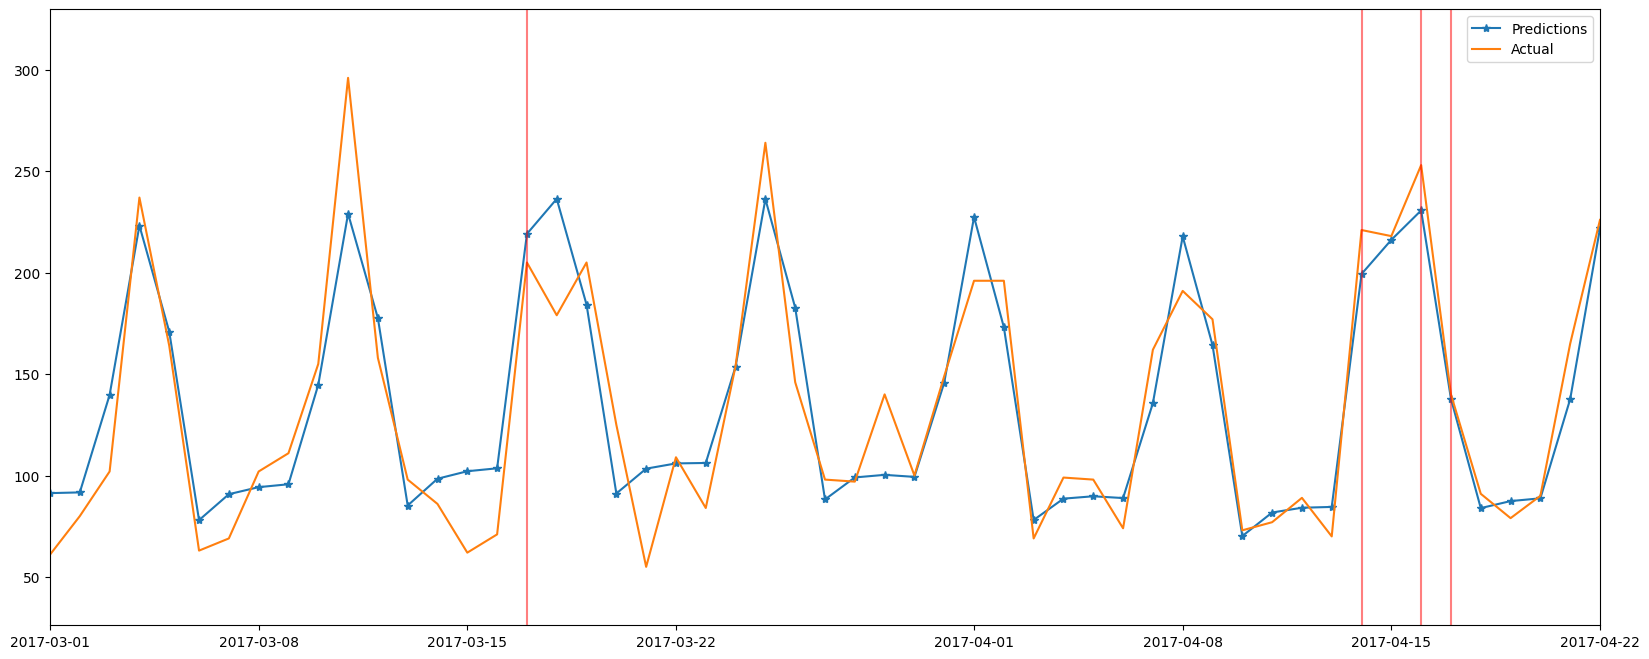

In [ ]:
plt.plot(forecast2['ds'], forecast2['yhat'],'-*', label = 'Predictions')
plt.plot(df['ds'], df['y'], label = 'Actual')
for x in df.query('holiday==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.xlim(pd.to_datetime('2017-03-01'), pd.to_datetime('2017-04-22'))
plt.legend()